In [301]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [302]:
# Define the ticker symbol
ticker_symbol_NVDA = 'NVDA'
ticker_symbol_AMD = 'AMD'

# Download stock data for NVIDIA
nvidia_data = yf.download(ticker_symbol_NVDA, start='2020-01-01', end='2024-08-01')
amd_data = yf.download(ticker_symbol_AMD, start='2020-01-01', end='2024-08-01')

# Save the data to a CSV file
nvidia_data.to_csv('nvidia_stock_data.csv')
amd_data.to_csv('amd-stock_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [303]:
nvidia_data_modelling = nvidia_data.copy()
nvidia_data_fluctuation = nvidia_data.copy()
nvidia_data.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100
2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300
2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200


In [304]:
amd_data.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-29,141.190002,144.589996,138.750000,139.750000,139.750000,47447200
2024-07-30,139.880005,141.699997,134.050003,138.440002,138.440002,68801700
2024-07-31,150.729996,153.600006,140.029999,144.479996,144.479996,114306800


# Growth in Past 4 years

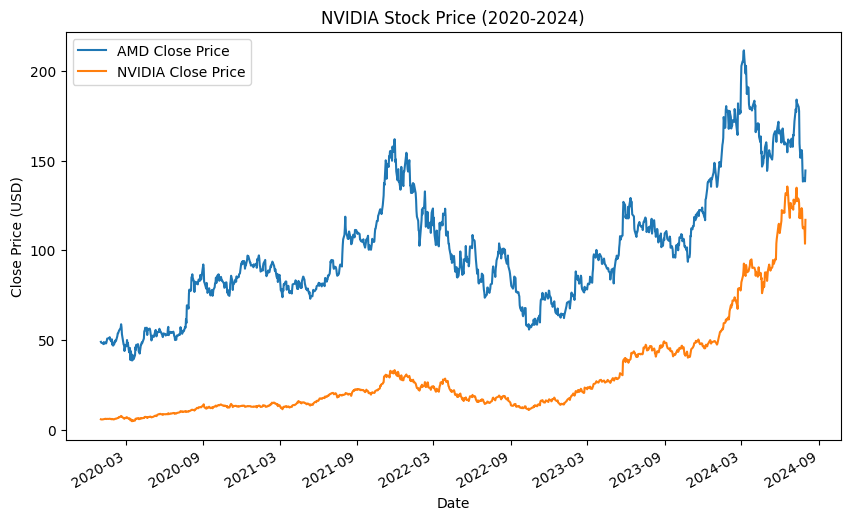

In [305]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(amd_data['Close'], label='AMD Close Price')
plt.plot(nvidia_data['Close'], label='NVIDIA Close Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('NVIDIA Stock Price (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(False)

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


# Growth in Market capitalization in Past 6 months

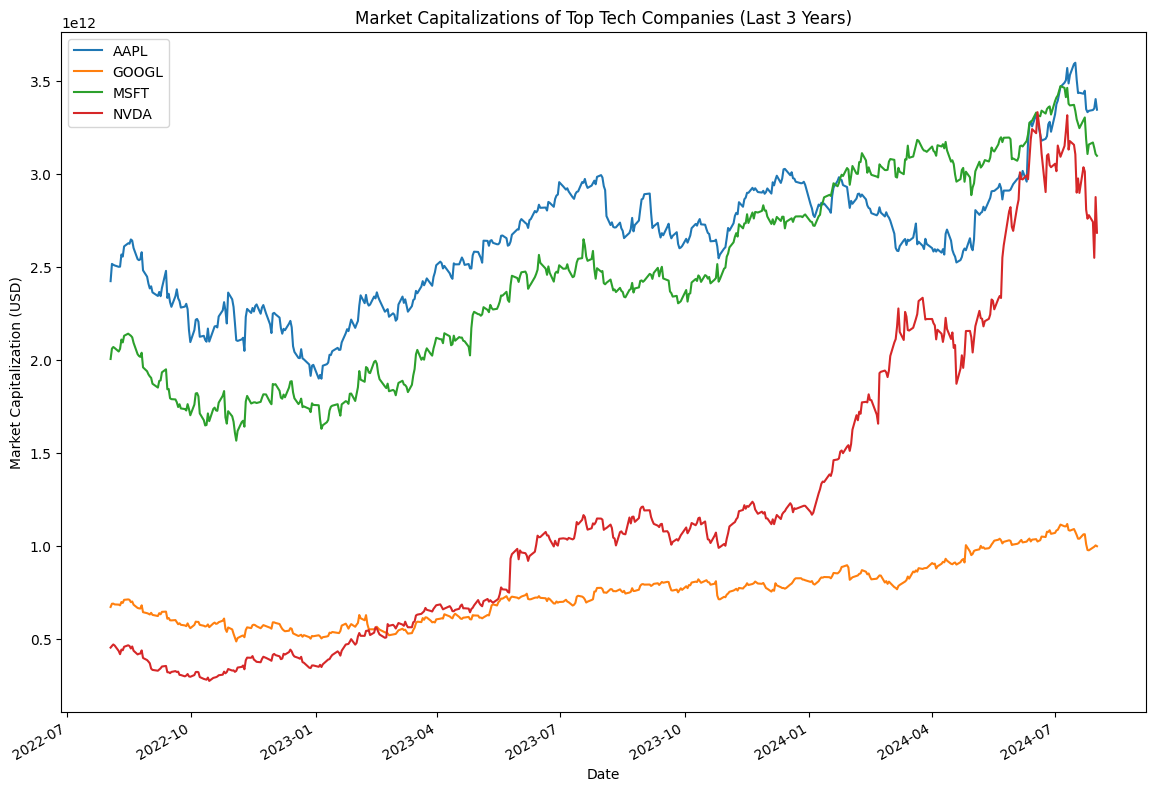

In [306]:
# Define the ticker symbols for the companies
tickers = ['AAPL', 'GOOGL', 'MSFT', 'NVDA']

# Fetch current shares outstanding and historical data for the past 3 years
data = {}
shares_outstanding = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(period='2y')
    shares_outstanding[ticker] = stock.info['sharesOutstanding']

# Plot the market capitalizations
plt.figure(figsize=(14, 10))

for ticker in tickers:
    stock_data = data[ticker]
    market_cap = stock_data['Close'] * shares_outstanding[ticker]
    plt.plot(stock_data.index, market_cap, label=ticker)

# Set x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Title and labels
plt.title('Market Capitalizations of Top Tech Companies (Last 3 Years)')
plt.xlabel('Date')
plt.ylabel('Market Capitalization (USD)')
plt.legend()
plt.grid(False)

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


# Event Impact Analysis in past two months

In [307]:
# Load your data
nvidia_data = nvidia_data.reset_index()
amd_data = amd_data.reset_index()  # Replace with your actual file or DataFrame loading

# Rename the new column if needed
nvidia_data.rename(columns={nvidia_data.columns[0]: 'Date'}, inplace=True)
amd_data.rename(columns={amd_data.columns[0]: 'Date'}, inplace=True)

# Check and update the actual column name for dates
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
amd_data['Date'] = pd.to_datetime(amd_data['Date'])

# Convert 'Date' column to datetime
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
amd_data['Date'] = pd.to_datetime(amd_data['Date'])

# Define the date range
start_date = pd.to_datetime('2024-06-01')
end_date = pd.to_datetime('2024-08-31')

# Filter data for the date range
nvidia_data_filtered = nvidia_data[(nvidia_data['Date'] >= start_date) & (nvidia_data['Date'] <= end_date)]

### Events:
E1 : ('2023-06-08', 'EU AI Act'), 

E2 : ('2024-06-02', 'NVIDIA Rubin Chips Launch'),

E3 : ('2024-06-18', 'NVIDIA Market Cap Highest'),

E4 : ('2024-06-29', 'Goldman Sachs AI ROI'),

E5 : ('2024-07-17', 'TSMC shares fall after Trump questions Taiwan commitment'),

E6 : ('2024-07-25', 'Califorina Anti-AI bill proposed'),

E7 : ('2024-07-29', 'Investors sell stocks booking profit before release of earnings due to avoid loss due to geopolitics tension'),

E8 : ('2024-08-01', 'EU AI Law Implementation')

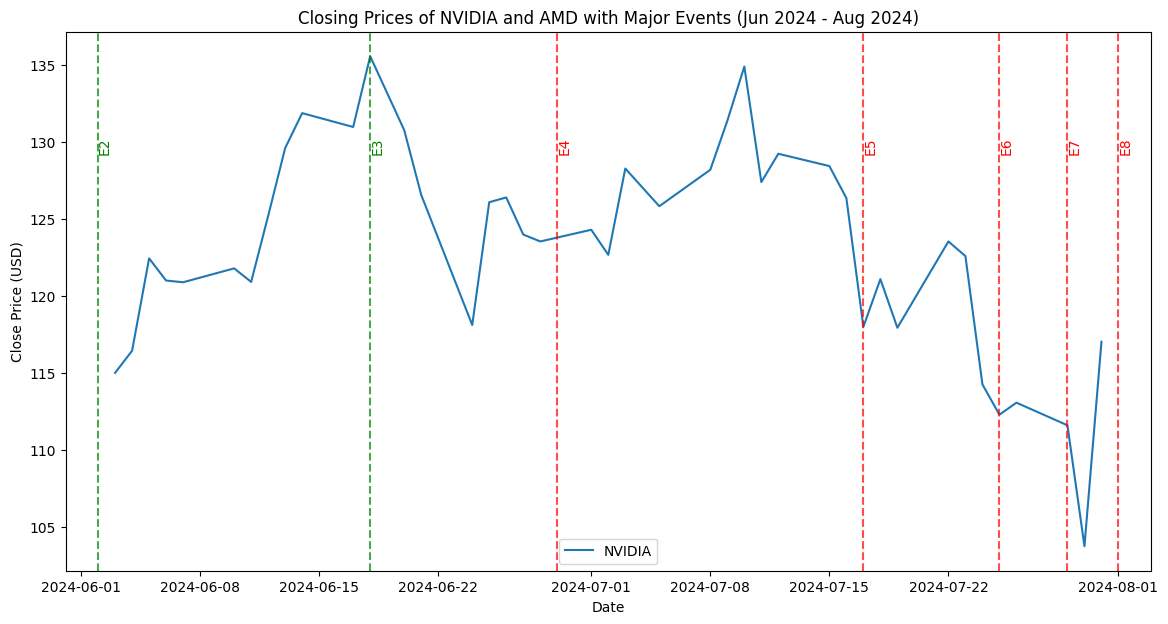

In [308]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(nvidia_data_filtered['Date'], nvidia_data_filtered['Close'], label='NVIDIA')

# Define events with their sentiment
positive_events = [
    ('2024-06-02', 'E2'),
    ('2024-06-18', 'E3')
]

negative_events = [
    ('2023-06-08', 'E1'),
    ('2024-06-29', 'E4'),
    ('2024-07-17', 'E5'),
    ('2024-07-25', 'E6'),
    ('2024-07-29', 'E7'),
    ('2024-08-01', 'E8')
]

# Plot positive events
for event_date, event_name in positive_events:
    event_date = pd.to_datetime(event_date)
    if start_date <= event_date <= end_date:
        plt.axvline(event_date, color='green', linestyle='--', alpha=0.7)
        plt.text(event_date, plt.ylim()[1] * 0.95, event_name, rotation=90, verticalalignment='top', color='green')

# Plot negative events
for event_date, event_name in negative_events:
    event_date = pd.to_datetime(event_date)
    if start_date <= event_date <= end_date:
        plt.axvline(event_date, color='red', linestyle='--', alpha=0.7)
        plt.text(event_date, plt.ylim()[1] * 0.95, event_name, rotation=90, verticalalignment='top', color='red')

plt.title('Closing Prices of NVIDIA and AMD with Major Events (Jun 2024 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(False)
plt.show()

In [309]:
nvidia_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973633,237536000
1,2020-01-03,5.87750,5.94575,5.85250,5.90175,5.878019,205384000
2,2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902669,262636000
3,2020-01-07,5.95500,6.04425,5.90975,5.99825,5.974131,314856000
4,2020-01-08,5.99400,6.05100,5.95375,6.00950,5.985336,277108000


NVIDIA Average Weekly Change from June 2024 to July 2024: -0.80%
AMD Average Weekly Change from June 2024 to July 2024: -1.75%


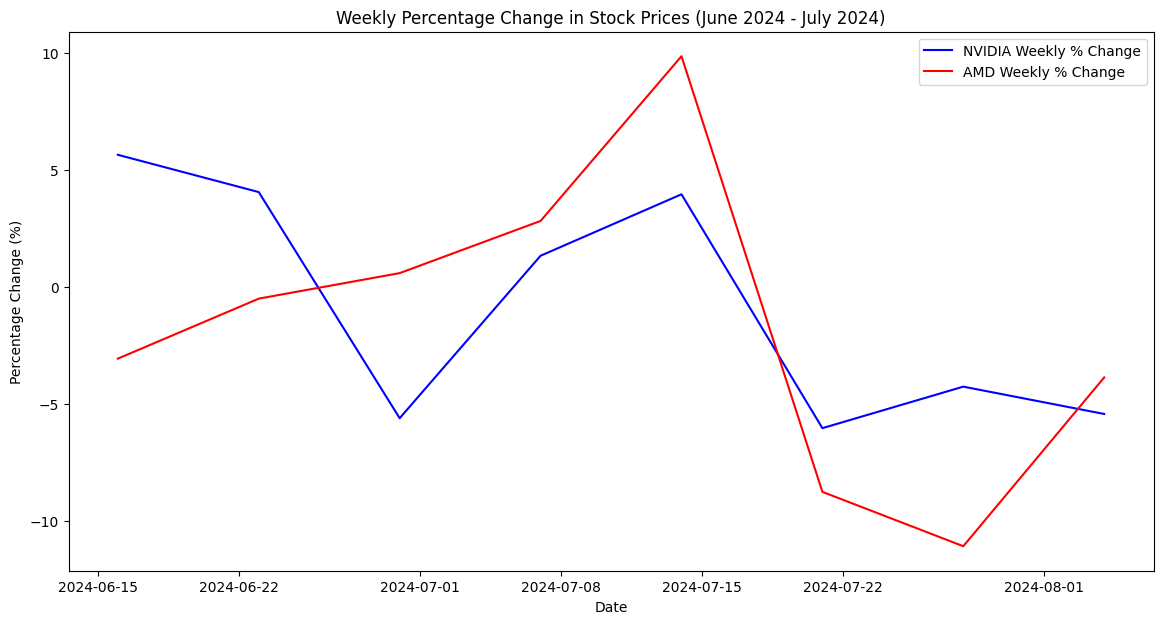

In [310]:
# Load the data
# nvidia_data = pd.read_csv('nvidia_stock_data.csv', index_col='Date', parse_dates=True)
# amd_data = pd.read_csv('amd-stock_data.csv', index_col='Date', parse_dates=True)
nvidia_data.set_index('Date', inplace=True)
amd_data.set_index('Date', inplace=True)
# Filter data from June 2024 to July 2024
start_date = '2024-06-01'
end_date = '2024-07-31'
nvidia_filtered = nvidia_data.loc[start_date:end_date]
amd_filtered = amd_data.loc[start_date:end_date]

# Resample data to weekly frequency
nvidia_weekly = nvidia_filtered['Close'].resample('W').mean()
amd_weekly = amd_filtered['Close'].resample('W').mean()

# Calculate weekly percentage changes
nvidia_weekly_change = nvidia_weekly.pct_change() * 100  # percentage change
amd_weekly_change = amd_weekly.pct_change() * 100  # percentage change

# Calculate the average weekly change
nvidia_avg_weekly_change = nvidia_weekly_change.mean()
amd_avg_weekly_change = amd_weekly_change.mean()

print(f"NVIDIA Average Weekly Change from June 2024 to July 2024: {nvidia_avg_weekly_change:.2f}%")
print(f"AMD Average Weekly Change from June 2024 to July 2024: {amd_avg_weekly_change:.2f}%")

# Plot weekly changes for visualization

plt.figure(figsize=(14, 7))
plt.plot(nvidia_weekly_change.index, nvidia_weekly_change, label='NVIDIA Weekly % Change', color='blue')
plt.plot(amd_weekly_change.index, amd_weekly_change, label='AMD Weekly % Change', color='red')
plt.title('Weekly Percentage Change in Stock Prices (June 2024 - July 2024)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(False)
plt.show()


## ARIMA Forecast

C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported 

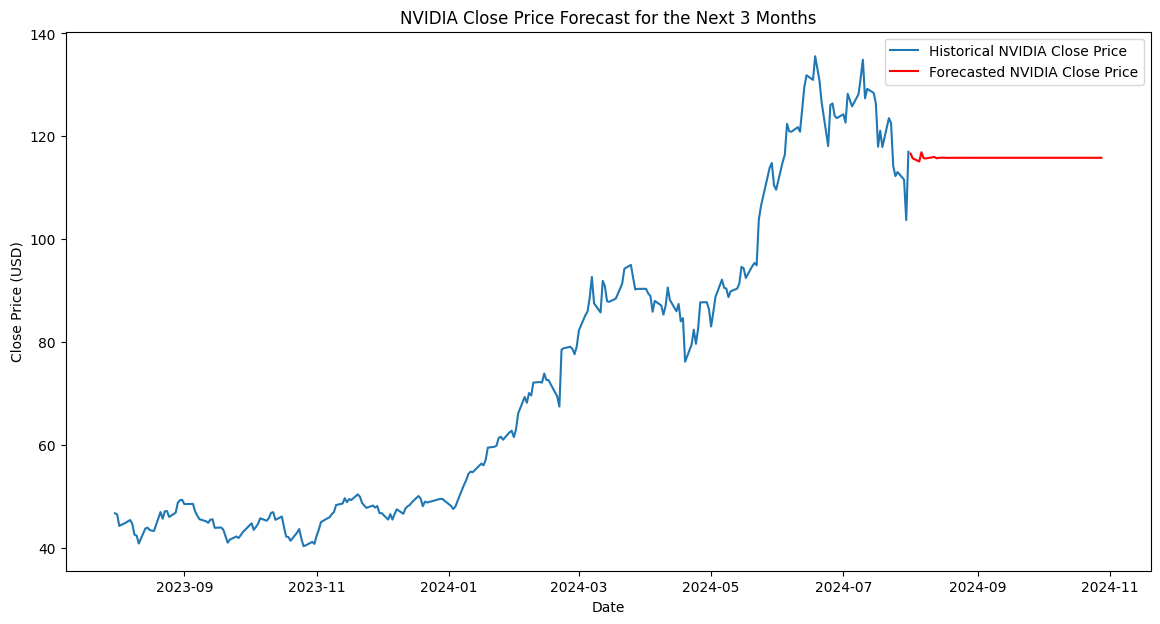

In [311]:
# Load your data
#nvidia_data = pd.read_csv('nvidia_stock_data.csv', index_col='Date', parse_dates=True)
# Filter data for the last year
end_date = nvidia_data.index[-1]
start_date = end_date - pd.DateOffset(years=1)
nvidia_last_year = nvidia_data.loc[start_date:end_date]

# Prepare the data
nvidia_close = nvidia_last_year['Close'].dropna()

# Fit ARIMA model
model = ARIMA(nvidia_close, order=(5, 1, 0))  # Adjust order (p,d,q) as necessary
model_fit = model.fit()

# Make predictions for the next 3 months
forecast_steps = 3 * 21  # Assuming 21 business days per month
forecast = model_fit.forecast(steps=forecast_steps)

# Generate forecast index
last_date = nvidia_close.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(nvidia_close, label='Historical NVIDIA Close Price')
plt.plot(forecast_index, forecast, label='Forecasted NVIDIA Close Price', color='red')
plt.title('NVIDIA Close Price Forecast for the Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(False)
plt.show()

In [312]:
# Filter data from January 2023 onwards
nvidia_data = nvidia_data_modelling[nvidia_data.index >= '2024-01-01']

# Create features (e.g., moving averages) and target variable
nvidia_data['SMA_20'] = nvidia_data['Close'].rolling(window=20).mean()
nvidia_data['SMA_50'] = nvidia_data['Close'].rolling(window=50).mean()
nvidia_data.dropna(inplace=True)  # Drop rows with NaN values

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_13928\2633280403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_data['SMA_20'] = nvidia_data['Close'].rolling(window=20).mean()
C:\Users\Prajakta\AppData\Local\Temp\ipykernel_13928\2633280403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_data['SMA_50'] = nvidia_data['Close'].rolling(window=50).mean()
C:\Users\Prajakta\AppData\Local\Temp\ipykernel_13928\2633280403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

#### The predicted value is far different than actual price because recently due to news related to US election which will ultimately lead to change in power and countries rules and regulations brought uncertainities in market, in addition to it the goeploitics issue between CHina and the US.

In [313]:
# Convert dates to ordinal format for regression
nvidia_data['Date_Ordinal'] = nvidia_data.index.to_series().map(pd.Timestamp.toordinal)

# Define features and target
X = nvidia_data[['Date_Ordinal', 'SMA_20', 'SMA_50']]
y = nvidia_data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_13928\1388756340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_data['Date_Ordinal'] = nvidia_data.index.to_series().map(pd.Timestamp.toordinal)


In [314]:
# Linear Regression
lin_reg = LinearRegression()
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
# Random Forest Regressor
rf_model = RandomForestRegressor()
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
# Support Vector Regressor (SVR)
scaler_X = StandardScaler()
svr_model = SVR()

# Hyperparameters for GridSearchCV
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
param_grid_gb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_svr = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1]}

# Grid Search
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=tscv)
grid_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=tscv)
grid_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=tscv)

# Fit models with Grid Search
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
grid_svr.fit(X_train_scaled, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1]})

In [315]:

# Train final models with best parameters
best_rf_model = grid_rf.best_estimator_
best_gb_model = grid_gb.best_estimator_
best_svr_model = grid_svr.best_estimator_

# Train Linear Regression and Decision Tree Regressor models
lin_reg.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# LSTM Model
scaler_y = MinMaxScaler()
scaled_data = scaler_y.fit_transform(nvidia_data[['Close']])

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20
X_seq, y_seq = create_sequences(scaled_data, SEQ_LENGTH)
X_seq_train, X_seq_test = X_seq[:-int(len(X_seq)*0.2)], X_seq[-int(len(X_seq)*0.2):]
y_seq_train, y_seq_test = y_seq[:-int(len(y_seq)*0.2)], y_seq[-int(len(y_seq)*0.2):]

model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_seq_train, y_seq_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.2412 - val_loss: 0.5472
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2093 - val_loss: 0.5100
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2033 - val_loss: 0.4710
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1752 - val_loss: 0.4280
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1697 - val_loss: 0.3803
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1419 - val_loss: 0.3297
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1353 - val_loss: 0.2734
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0977 - val_loss: 0.2106
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0833 - val_loss: 0.1431
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0618 - val_loss: 0.0747


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Combined Model MSE: 50.90145035767971


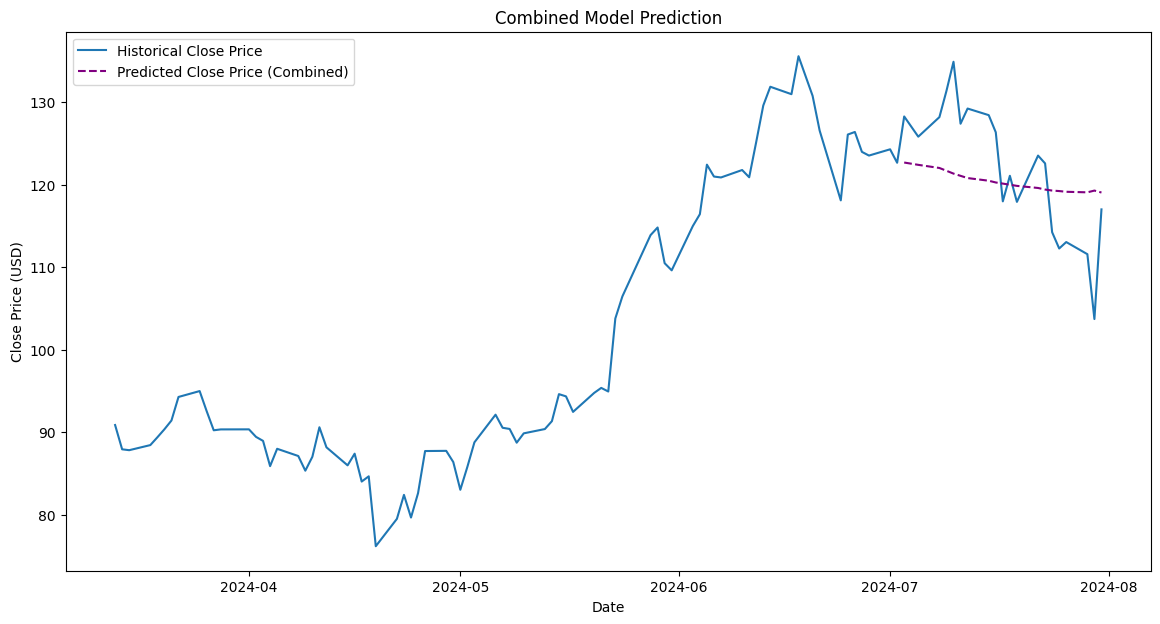

In [316]:
# Predict using all models
y_pred_lin = lin_reg.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)
y_pred_svr = best_svr_model.predict(X_test_scaled)

# LSTM predictions
y_pred_lstm = model_lstm.predict(X_seq_test)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)
y_seq_test = scaler_y.inverse_transform(y_seq_test)

# Combine predictions (simple average)
y_pred_combined = np.mean([y_pred_rf, y_pred_gb, y_pred_svr], axis=0)

# Evaluate and plot
mse_combined = mean_squared_error(y_test, y_pred_combined)
print(f'Combined Model MSE: {mse_combined}')

plt.figure(figsize=(14, 7))
plt.plot(nvidia_data.index, nvidia_data['Close'], label='Historical Close Price')
plt.plot(nvidia_data.index[-len(y_test):], y_pred_combined, label='Predicted Close Price (Combined)', color='purple', linestyle='--')
plt.title('Combined Model Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(False)
plt.show()